In [2]:
import numpy as np
import matplotlib.pyplot as plt
from LaughlinWavefnSWAP import LLLSymmetricGauge, LLLSymmetricGaugeGrid, ThetaFunction
from scipy.integrate import dblquad

# Functions

In [19]:
data = np.loadtxt(f"IQHE_entropy_results/N_{Ne}/ED/norm/laughlin_sq_norm_N_{Ns}_t_{np.imag(t):.3f}.dat", dtype=np.complex128)
norms = np.sqrt(data[:,0])

def InnerProductReal(y,x,n,m,Ns,t):
    return np.real(LLLSymmetricGauge(x+1j*y,Ns,t,m)*np.conj(LLLSymmetricGauge(x+1j*y,Ns,t,n)))/(norms[n]*norms[m])
def InnerProductImag(y,x,n,m,Ns,t):
    return np.imag(LLLSymmetricGauge(x+1j*y,Ns,t,m)*np.conj(LLLSymmetricGauge(x+1j*y,Ns,t,n)))/(norms[n]*norms[m])

# Results

## Strip geometry

In [2]:
N = 15
Ns = N
ts = 1j*np.arange(0.5,2.1,0.25)
Lxs = np.sqrt(2*np.pi*Ns/np.imag(ts))
Lys = Lxs*np.imag(ts)

for i in range(ts.size):
    print(f"Torus dimensions at t = {ts[i]} \nLx = ",Lxs[i], "\nLy = ",Lys[i])

Torus dimensions at t = 0.5j 
Lx =  13.729368492956533 
Ly =  6.864684246478267
Torus dimensions at t = 0.75j 
Lx =  11.209982432795856 
Ly =  8.407486824596893
Torus dimensions at t = 1j 
Lx =  9.708129562778495 
Ly =  9.708129562778495
Torus dimensions at t = 1.25j 
Lx =  8.683215054699211 
Ly =  10.854018818374014
Torus dimensions at t = 1.5j 
Lx =  7.926654595212021 
Ly =  11.889981892818032
Torus dimensions at t = 1.75j 
Lx =  7.338656148201747 
Ly =  12.842648259353057
Torus dimensions at t = 2j 
Lx =  6.864684246478267 
Ly =  13.729368492956533


In [4]:
#get normalisation constants:
for k in range(ts.size):
    overlaps = np.zeros(Ns, dtype=np.complex128)
    errors = np.zeros(Ns, dtype=np.complex128)
    for i in range(Ns):
        print(f"Calculating norm of state {i}..")
        re, re_err = dblquad(InnerProductReal, -Lxs[k]/2, Lxs[k]/2, -Lys[k]/2, Lys[k]/2, args=(i,i,Ns,ts[k]))
        overlaps[i] = re
        errors[i] = re_err
    np.savetxt(f"IQHE_entropy_results/N_{N}/ED/sq_norm_N_{Ns}_r_{np.imag(ts[k]):.3f}.dat",np.vstack((overlaps,errors)).T)

Calculating norm of state 0..
Calculating norm of state 1..
Calculating norm of state 2..
Calculating norm of state 3..
Calculating norm of state 4..
Calculating norm of state 5..
Calculating norm of state 6..
Calculating norm of state 7..
Calculating norm of state 8..
Calculating norm of state 9..
Calculating norm of state 10..
Calculating norm of state 11..
Calculating norm of state 12..
Calculating norm of state 13..
Calculating norm of state 14..
Calculating norm of state 0..
Calculating norm of state 1..
Calculating norm of state 2..
Calculating norm of state 3..
Calculating norm of state 4..
Calculating norm of state 5..
Calculating norm of state 6..
Calculating norm of state 7..
Calculating norm of state 8..
Calculating norm of state 9..
Calculating norm of state 10..
Calculating norm of state 11..
Calculating norm of state 12..
Calculating norm of state 13..
Calculating norm of state 14..
Calculating norm of state 0..
Calculating norm of state 1..
Calculating norm of state 2..


In [5]:
norms = np.zeros((ts.size,Ns))
for k in range(ts.size):
    data = np.loadtxt(f"IQHE_entropy_results/N_{N}/ED/sq_norm_N_{Ns}_r_{np.imag(ts[k]):.3f}.dat", dtype=np.complex128)
    norms[k,:] = np.sqrt(data[:,0])

C:\Users\crist\AppData\Local\Temp\ipykernel_16860\1968240739.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  norms[k,:] = np.sqrt(data[:,0])


In [6]:
for k in range(ts.size):
    M = np.zeros(Ns, dtype=np.complex128)
    real_errors = np.zeros(Ns, dtype=np.complex128)
    imag_errors = np.zeros(Ns, dtype=np.complex128)
    for i in range(Ns):
        print(f"Calculating norm of state {i,i}..")
        re, re_err = dblquad(inner_product_real, -Lxs[k]/2, Lxs[k]/2, -Lys[k]/2, 0, args=(i,i,Ns,ts[k]))
        im, im_err = dblquad(inner_product_imag, -Lxs[k]/2, Lxs[k]/2, -Lys[k]/2, 0, args=(i,i,Ns,ts[k]))
        M[i] = (re+1j*im)/(norms[k,i]**2)
        real_errors[i] = re_err/(norms[k,i]**2)
        imag_errors[i] = im_err/(norms[k,i]**2)
    np.savetxt(f"IQHE_entropy_results/N_{N}/ED/overlap_diag_N_{Ns}_r_{np.imag(ts[k]):.3f}.dat",np.vstack((M,real_errors,imag_errors)).T)

Calculating norm of state (0, 0)..
Calculating norm of state (1, 1)..
Calculating norm of state (2, 2)..
Calculating norm of state (3, 3)..
Calculating norm of state (4, 4)..
Calculating norm of state (5, 5)..
Calculating norm of state (6, 6)..
Calculating norm of state (7, 7)..
Calculating norm of state (8, 8)..
Calculating norm of state (9, 9)..
Calculating norm of state (10, 10)..
Calculating norm of state (11, 11)..
Calculating norm of state (12, 12)..
Calculating norm of state (13, 13)..
Calculating norm of state (14, 14)..
Calculating norm of state (0, 0)..
Calculating norm of state (1, 1)..
Calculating norm of state (2, 2)..
Calculating norm of state (3, 3)..
Calculating norm of state (4, 4)..
Calculating norm of state (5, 5)..
Calculating norm of state (6, 6)..
Calculating norm of state (7, 7)..
Calculating norm of state (8, 8)..
Calculating norm of state (9, 9)..
Calculating norm of state (10, 10)..
Calculating norm of state (11, 11)..
Calculating norm of state (12, 12)..
Calc

In [12]:
for k in range(ts.size):
    M = np.zeros((Ns,Ns), dtype=np.complex128)
    real_errors = np.zeros((Ns,Ns), dtype=np.complex128)
    imag_errors = np.zeros((Ns,Ns), dtype=np.complex128)
    for i in range(Ns):
        for j in range(Ns):
            print(f"Calculating norm of state {i,j}..")
            re, re_err = dblquad(inner_product_real, -Lxs[k]/2, Lxs[k]/2, -Lys[k]/2, 0, args=(i,j,Ns,ts[k]))
            im, im_err = dblquad(inner_product_imag, -Lxs[k]/2, Lxs[k]/2, -Lys[k]/2, 0, args=(i,j,Ns,ts[k]))
            M[i,j] = (re+1j*im)/(norms[k,i]*norms[k,j])
            real_errors[i,j] = re_err/(norms[k,i]*norms[k,j])
            imag_errors[i,j] = im_err/(norms[k,i]*norms[k,j])
    np.savetxt(f"overlap_matrix_N_{Ns}_r_{np.imag(ts[k]):.3f}.dat",M)
    np.savetxt(f"real_errors_N_{Ns}_r_{np.imag(ts[k]):.3f}.dat",real_errors)
    np.savetxt(f"imag_errors_N_{Ns}_r_{np.imag(ts[k]):.3f}.dat",imag_errors)

Calculating norm of state (0, 0)..
Calculating norm of state (0, 1)..


c:\Users\crist\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\crist\anaconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Calculating norm of state (0, 2)..
Calculating norm of state (0, 3)..


KeyboardInterrupt: 

In [ ]:
#get overlap matrix for region A: y in [-Ly/2, 0] (cut length Lx)
M = np.zeros((Ns,Ns), dtype=np.complex128)

for i in range(Ns):
    for j in range(Ns):
        print(f"Calculating overlap for states {i,j}..")
        re, re_err = dblquad(inner_product_real, -Lx/2, Lx/2, -Ly/2, 0, args=(i,j,Ns,t))
        im, im_err = dblquad(inner_product_imag, -Lx/2, Lx/2, -Ly/2, 0, args=(i,j,Ns,t))
        M[i,j] = (re + 1j*im)/(norms[i]*norms[j])

In [8]:
psi = LLLSymmetricGaugeGrid(Ns, t, 2, 50) * np.conj(LLLSymmetricGaugeGrid(Ns, t, 10, 50))

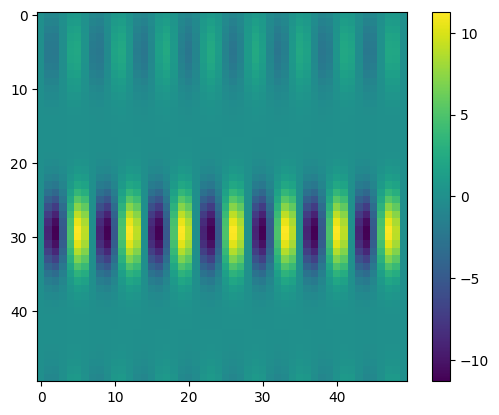

In [12]:
plt.imshow(np.imag(psi).T)
plt.colorbar()

## Circle geometry

In [4]:
Ne = 30
Ns = Ne
t = 1j
Lx = np.sqrt(2*np.pi*Ns/np.imag(t))
Ly = Lx*np.imag(t)
radii_unscaled = np.arange(0.20, 0.401, 0.02)
radii = Ly*radii_unscaled
state = 'laughlin'
N = Ne

In [32]:
i = 2
n = 2
m = 3
dblquad(InnerProductImag, Lx/2-radii[i], Lx/2+radii[i],
                                     lambda x: (
                                     Ly/2 - np.sqrt(radii[i]**2 - (x-Lx/2)**2)),
                                     lambda x: (
                                     Ly/2 + np.sqrt(radii[i]**2 - (x-Lx/2)**2)),
                                     args=(n, m, N, t))

c:\Users\crist\miniconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:575: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)


(-1.9493521685119304e-19, 1.0384025524530978e-09)

### Get normalisation

In [4]:
#get normalisation constants:
overlaps = np.zeros(Ns, dtype=np.complex128)
errors = np.zeros(Ns, dtype=np.complex128)
for i in range(Ns):
    print(f"Calculating norm of state {i}..")
    re, re_err = dblquad(InnerProductReal, 0, Lx, 0, Ly, args=(i,i,Ns,t))
    overlaps[i] = re
    errors[i] = re_err
np.savetxt(f"IQHE_entropy_results/N_{N}/ED/laughlin_sq_norm_N_{Ns}_t_{np.imag(t):.3f}.dat",np.vstack((overlaps,errors)).T)

Calculating norm of state 0..
Calculating norm of state 1..
Calculating norm of state 2..
Calculating norm of state 3..
Calculating norm of state 4..
Calculating norm of state 5..
Calculating norm of state 6..
Calculating norm of state 7..
Calculating norm of state 8..
Calculating norm of state 9..
Calculating norm of state 10..
Calculating norm of state 11..
Calculating norm of state 12..
Calculating norm of state 13..
Calculating norm of state 14..
Calculating norm of state 15..
Calculating norm of state 16..
Calculating norm of state 17..
Calculating norm of state 18..
Calculating norm of state 19..
Calculating norm of state 20..
Calculating norm of state 21..
Calculating norm of state 22..
Calculating norm of state 23..
Calculating norm of state 24..
Calculating norm of state 25..
Calculating norm of state 26..
Calculating norm of state 27..
Calculating norm of state 28..
Calculating norm of state 29..


In [ ]:
norms = np.zeros((ts.size,Ns))
for k in range(ts.size):
    data = np.loadtxt(f"IQHE_entropy_results/N_{N}/ED/sq_norm_N_{Ns}_r_{np.imag(ts[k]):.3f}.dat", dtype=np.complex128)
    norms[k,:] = np.sqrt(data[:,0])

In [23]:
from numba import njit

@njit
def SlaterDetOverlapMatrix (N: np.uint16, norms,
                            x_min: np.float64, x_max: np.float64,
                            y_min, y_max):
    M = np.zeros((Ns,Ns), dtype=np.complex128)
    real_errors = np.zeros((Ns,Ns), dtype=np.complex128)
    imag_errors = np.zeros((Ns,Ns), dtype=np.complex128)
    for n in range(Ns):
        for m in range(Ns):
            print(f"Calculating overlap of state {n,m}..")
            re, re_err = dblquad(InnerProductReal, x_min, x_max,
                                 y_min, y_max, args=(n,m,Ns,t))
            im, im_err = dblquad(InnerProductImag, x_min, x_max,
                                 y_min, y_max, args=(n,m,Ns,t))
            M[n,m] = (re+1j*im)#/(norms[k,n]**2)
            #real_errors[n,m] = re_err/(norms[k,n]**2)
            #imag_errors[n,m] = im_err/(norms[k,n]**2)

### Get overlap matrix

In [5]:
for i in range(radii.size):
    print(f"Circle radius {radii[i]}")
    M = np.zeros((N, N), dtype=np.complex128)
    real_errors = np.zeros((N, N), dtype=np.float64)
    imag_errors = np.zeros((N, N), dtype=np.float64)

    for n in range(N):
        print(f"Calculating diagonal overlap of state {n}..")
        real, real_err = dblquad(InnerProductReal, Lx/2-radii[i], Lx/2+radii[i],
                                 lambda x: (
            Ly/2 - np.sqrt(radii[i]**2 - (x-Lx/2)**2)),
            lambda x: (
            Ly/2 + np.sqrt(radii[i]**2 - (x-Lx/2)**2)),
            args=(n, n, N, t))
        M[n, n] = real
        real_errors[n, n] = real_err

    for n in range(N):
        for m in range(n+1, N):
            print(f"Calculating overlap of states {n,m}..")
            real, real_err = dblquad(InnerProductReal, Lx/2-radii[i], Lx/2+radii[i],
                                     lambda x: (
                                     Ly/2 - np.sqrt(radii[i]**2 - (x-Lx/2)**2)),
                                     lambda x: (
                                     Ly/2 + np.sqrt(radii[i]**2 - (x-Lx/2)**2)),
                                     args=(n, m, N, t))
            imag, imag_err = dblquad(InnerProductImag, Lx/2-radii[i], Lx/2+radii[i],
                                     lambda x: (
                                     Ly/2 - np.sqrt(radii[i]**2 - (x-Lx/2)**2)),
                                     lambda x: (
                                     Ly/2 + np.sqrt(radii[i]**2 - (x-Lx/2)**2)),
                                     args=(n, m, N, t))
            M[n, m] = (real+1j*imag)
            real_errors[n, m] = real_err
            imag_errors[n, m] = imag_err

            
            M[m, n] = (real-1j*imag)
            real_errors[m, n] = real_err
            imag_errors[m, n] = imag_err

    np.save(f"{state}_overlaps_N_{N}_circle_{radii_unscaled[i]:.3f}.npy", M)
    np.save(
        f"{state}_overlaps_real_err_N_{N}_circle_{radii_unscaled[i]:.3f}.npy", real_errors)
    np.save(
        f"{state}_overlaps_imag_err_N_{N}_circle_{radii_unscaled[i]:.3f}.npy", imag_errors)

Circle radius 2.745873698591307
Calculating diagonal overlap of state 0..
Calculating diagonal overlap of state 1..
Calculating diagonal overlap of state 2..
Calculating diagonal overlap of state 3..
Calculating diagonal overlap of state 4..
Calculating diagonal overlap of state 5..
Calculating diagonal overlap of state 6..
Calculating diagonal overlap of state 7..
Calculating diagonal overlap of state 8..
Calculating diagonal overlap of state 9..
Calculating diagonal overlap of state 10..
Calculating diagonal overlap of state 11..
Calculating diagonal overlap of state 12..
Calculating diagonal overlap of state 13..
Calculating diagonal overlap of state 14..
Calculating diagonal overlap of state 15..
Calculating diagonal overlap of state 16..
Calculating diagonal overlap of state 17..
Calculating diagonal overlap of state 18..
Calculating diagonal overlap of state 19..
Calculating diagonal overlap of state 20..
Calculating diagonal overlap of state 21..
Calculating diagonal overlap of 

c:\Users\crist\miniconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
c:\Users\crist\miniconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Calculating overlap of states (0, 2)..
Calculating overlap of states (0, 3)..
Calculating overlap of states (0, 4)..
Calculating overlap of states (0, 5)..
Calculating overlap of states (0, 6)..
Calculating overlap of states (0, 7)..
Calculating overlap of states (0, 8)..
Calculating overlap of states (0, 9)..
Calculating overlap of states (0, 10)..
Calculating overlap of states (0, 11)..
Calculating overlap of states (0, 12)..
Calculating overlap of states (0, 13)..
Calculating overlap of states (0, 14)..
Calculating overlap of states (0, 15)..
Calculating overlap of states (0, 16)..
Calculating overlap of states (0, 17)..
Calculating overlap of states (0, 18)..
Calculating overlap of states (0, 19)..
Calculating overlap of states (0, 20)..
Calculating overlap of states (0, 21)..
Calculating overlap of states (0, 22)..
Calculating overlap of states (0, 23)..
Calculating overlap of states (0, 24)..
Calculating overlap of states (0, 25)..
Calculating overlap of states (0, 26)..
Calculat

c:\Users\crist\miniconda3\lib\site-packages\scipy\integrate\_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Calculating overlap of states (1, 4)..
Calculating overlap of states (1, 5)..
Calculating overlap of states (1, 6)..
Calculating overlap of states (1, 7)..
Calculating overlap of states (1, 8)..
Calculating overlap of states (1, 9)..
Calculating overlap of states (1, 10)..
Calculating overlap of states (1, 11)..
Calculating overlap of states (1, 12)..
Calculating overlap of states (1, 13)..
Calculating overlap of states (1, 14)..
Calculating overlap of states (1, 15)..
Calculating overlap of states (1, 16)..
Calculating overlap of states (1, 17)..
Calculating overlap of states (1, 18)..
Calculating overlap of states (1, 19)..
Calculating overlap of states (1, 20)..
Calculating overlap of states (1, 21)..
Calculating overlap of states (1, 22)..
Calculating overlap of states (1, 23)..
Calculating overlap of states (1, 24)..
Calculating overlap of states (1, 25)..
Calculating overlap of states (1, 26)..
Calculating overlap of states (1, 27)..
Calculating overlap of states (1, 28)..
Calcul

KeyboardInterrupt: 

### Entropy

In [ ]:
norms = np.zeros(Ns)
data = np.loadtxt(f"IQHE_entropy_results/N_{N}/ED/sq_norm_N_{Ns}_r_{np.imag(ts[k]):.3f}.dat", dtype=np.complex128)
norms = np.sqrt(data[:,0])

M = np.load(f"{state}_overlaps_N_{N}_circle_{0.100}.npy")
M /= (norms * norms.T)

In [ ]:

M = np.load(f"{state}_overlaps_N_{N}_circle_{radii_unscaled[i]}.npy")
M /= (norms * norms.T)

## Square geometry

In [28]:
Ne = 15
Ns = Ne
t = 1j
Lx = np.sqrt(2*np.pi*Ns/np.imag(t))
Ly = Lx*np.imag(t)
boundaries = np.arange(0.1, 0.221, 0.01)* Lx

In [ ]:
for i in range(boundaries.size):
    M = np.zeros((Ns,Ns), dtype=np.float64)
    for k in range(Ns):
        for j in range(Ns):
            M[k,j] = (boundaries[i]**2)*np.sinc(np.pi*boundaries[i]/L)

In [29]:
np.sinc(0)

1.0